In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
etf = pd.read_csv("ETF.csv", index_col=0, parse_dates=True).pct_change(fill_method=None).dropna()
              # ["VTI", "TLT", "SHY", "GLD", "GSG", "VNQ"]
etf.columns = ["VTI", "TLT", "SHY", "GLD", "GSG", "VNQ"]#["Stock","LongTerm","ShortTerm","Gold","Commodity","Real-Estate"]

In [13]:
etf

,VTI,TLT,SHY,GLD,GSG,VNQ
at,,,,,,
2006-07-24,0.019468,-0.000586,0.000000,-0.009237,0.009137,0.016504
2006-07-25,0.003370,-0.002932,-0.000251,0.006706,-0.009054,0.005166
2006-07-26,0.002719,0.003646,0.001255,0.007311,0.007513,0.003524
2006-07-27,-0.002552,-0.001523,0.000501,0.014516,0.010681,-0.003219
2006-07-28,0.008795,0.005750,0.001253,0.003339,-0.011964,0.014533
...,...,...,...,...,...,...
2023-04-25,-0.016676,0.014704,0.003901,0.005086,-0.018155,-0.009871
2023-04-26,-0.004513,-0.010658,-0.001214,-0.005437,-0.020490,-0.009600
2023-04-27,0.018780,-0.009923,-0.001945,0.000054,0.001531,0.022617


In [14]:
rolling_corr = etf.rolling(window=252).corr()
rolling_corr_drop = rolling_corr.dropna()
rolling_corr_drop

VTI       TLT       SHY       GLD       GSG       VNQ
at                                                                        
2007-07-24 VTI  1.000000 -0.055475 -0.116435  0.249119  0.155446  0.688870
           TLT -0.055475  1.000000  0.696814  0.003904 -0.081111  0.022875
           SHY -0.116435  0.696814  1.000000 -0.041273  0.006176 -0.068074
           GLD  0.249119  0.003904 -0.041273  1.000000  0.469788  0.167891
           GSG  0.155446 -0.081111  0.006176  0.469788  1.000000  0.025653
...                  ...       ...       ...       ...       ...       ...
2023-05-01 TLT  0.101982  1.000000  0.625527  0.396322 -0.099738  0.241130
           SHY  0.172140  0.625527  1.000000  0.562648  0.012871  0.277087
           GLD  0.280230  0.396322  0.562648  1.000000  0.313176  0.314648
           GSG  0.346501 -0.099738  0.012871  0.313176  1.000000  0.246943
           VNQ  0.834977  0.241130  0.277087  0.314648  0.246943  1.000000

[23826 rows x 6 columns]

In [15]:
corr_values = rolling_corr_drop.loc[:, ('VTI', 'TLT',"SHY")]  #('VTI', 'TLT',"SHY")
corr_matrix = corr_values.unstack()

In [16]:
corr_matrix_T = corr_matrix.T
corr_matrix_T

at       2007-07-24  2007-07-25  2007-07-26  2007-07-27  2007-07-30   
VTI GLD    0.249119    0.263731    0.279979    0.278978    0.283991  \
    GSG    0.155446    0.148523    0.149320    0.137413    0.138412   
    SHY   -0.116435   -0.118162   -0.145644   -0.156462   -0.163948   
    TLT   -0.055475   -0.055009   -0.076642   -0.082711   -0.087551   
    VNQ    0.688870    0.685606    0.686811    0.696748    0.700560   
    VTI    1.000000    1.000000    1.000000    1.000000    1.000000   
TLT GLD    0.003904    0.002149   -0.008227   -0.010920   -0.010378   
    GSG   -0.081111   -0.078680   -0.081667   -0.081774   -0.080772   
    SHY    0.696814    0.697027    0.701067    0.700729    0.702085   
    TLT    1.000000    1.000000    1.000000    1.000000    1.000000   
    VNQ    0.022875    0.022175    0.012386    0.004959    0.000611   
    VTI   -0.055475   -0.055009   -0.076642   -0.082711   -0.087551   
SHY GLD   -0.041273   -0.043611   -0.057899   -0.062458   -0.067178   
    GSG    0.006176    0.009548    0.006582    0.006791    0.005057   
    SHY    1.000000    1.000000    1.000000    1.000000    1.000000   
    TLT    0.696814    0.697027    0.701067    0.700729    0.702085   
    VNQ   -0.068074   -0.070653   -0.083265   -0.095002   -0.101789   
    VTI   -0.116435   -0.118162   -0.145644   -0.156462   -0.163948   

at       2007-07-31  2007-08-01  2007-08-02  2007-08-03  2007-08-06  ...   
VTI GLD    0.280990    0.281208    0.287757    0.261003    0.257300  ...  \
    GSG    0.136317    0.136079    0.135719    0.142008    0.117845  ...   
    SHY   -0.180525   -0.186719   -0.196547   -0.222717   -0.230271  ...   
    TLT   -0.104249   -0.107546   -0.107981   -0.126797   -0.138379  ...   
    VNQ    0.695361    0.696253    0.697861    0.713254    0.720393  ...   
    VTI    1.000000    1.000000    1.000000    1.000000    1.000000  ...   
TLT GLD   -0.011642   -0.012526   -0.007212   -0.003091   -0.001470  ...   
    GSG   -0.072399   -0.071548   -0.071622   -0.080634   -0.064676  ...   
    SHY    0.703086    0.695723    0.698551    0.701726    0.703688  ...   
    TLT    1.000000    1.000000    1.000000    1.000000    1.000000  ...   
    VNQ   -0.006996   -0.012337   -0.010967   -0.027107   -0.043583  ...   
    VTI   -0.104249   -0.107546   -0.107981   -0.126797   -0.138379  ...   
SHY GLD   -0.068355   -0.068825   -0.051478   -0.040770   -0.040077  ...   
    GSG    0.013541    0.022440    0.023081    0.014545    0.025241  ...   
    SHY    1.000000    1.000000    1.000000    1.000000    1.000000  ...   
    TLT    0.703086    0.695723    0.698551    0.701726    0.703688  ...   
    VNQ   -0.109624   -0.124671   -0.128498   -0.153327   -0.163451  ...   
    VTI   -0.180525   -0.186719   -0.196547   -0.222717   -0.230271  ...   

at       2023-04-18  2023-04-19  2023-04-20  2023-04-21  2023-04-24   
VTI GLD    0.274950    0.274916    0.283652    0.283026    0.282147  \
    GSG    0.321853    0.322274    0.336282    0.336396    0.337662   
    SHY    0.176860    0.176740    0.180621    0.180640    0.177464   
    TLT    0.105249    0.105124    0.106837    0.107693    0.105652   
    VNQ    0.832257    0.832025    0.831085    0.833429    0.833953   
    VTI    1.000000    1.000000    1.000000    1.000000    1.000000   
TLT GLD    0.389815    0.390293    0.389593    0.389355    0.389278   
    GSG   -0.100822   -0.099325   -0.107180   -0.109318   -0.107136   
    SHY    0.611314    0.611349    0.611808    0.613052    0.613179   
    TLT    1.000000    1.000000    1.000000    1.000000    1.000000   
    VNQ    0.247253    0.246910    0.249212    0.243780    0.242347   
    VTI    0.105249    0.105124    0.106837    0.107693    0.105652   
SHY GLD    0.556058    0.556493    0.553214    0.552909    0.552831   
    GSG    0.025963    0.027385    0.012308    0.011935    0.013777   
    SHY    1.000000    1.000000    1.000000    1.000000    1.000000   
    TLT    0.611314    0.611349    0.611808    0.613052    0.613179  

In [17]:
# 자기자신과의 corr은 1이기 때문에 Drop
corr_matrix_T_drop = corr_matrix_T.drop([("VTI","VTI"),        #("VTI","VTI"),   ("Stock","Stock"),
                                         ("TLT","TLT"),    #("TLT","TLT"),  ("Bond_20+","Bond_20+")
                                         ("SHY","SHY")])   #("SHY","SHY")     ("Bond_1+","Bond_1+")
corr_matrix_T_drop

at       2007-07-24  2007-07-25  2007-07-26  2007-07-27  2007-07-30   
VTI GLD    0.249119    0.263731    0.279979    0.278978    0.283991  \
    GSG    0.155446    0.148523    0.149320    0.137413    0.138412   
    SHY   -0.116435   -0.118162   -0.145644   -0.156462   -0.163948   
    TLT   -0.055475   -0.055009   -0.076642   -0.082711   -0.087551   
    VNQ    0.688870    0.685606    0.686811    0.696748    0.700560   
TLT GLD    0.003904    0.002149   -0.008227   -0.010920   -0.010378   
    GSG   -0.081111   -0.078680   -0.081667   -0.081774   -0.080772   
    SHY    0.696814    0.697027    0.701067    0.700729    0.702085   
    VNQ    0.022875    0.022175    0.012386    0.004959    0.000611   
    VTI   -0.055475   -0.055009   -0.076642   -0.082711   -0.087551   
SHY GLD   -0.041273   -0.043611   -0.057899   -0.062458   -0.067178   
    GSG    0.006176    0.009548    0.006582    0.006791    0.005057   
    TLT    0.696814    0.697027    0.701067    0.700729    0.702085   
    VNQ   -0.068074   -0.070653   -0.083265   -0.095002   -0.101789   
    VTI   -0.116435   -0.118162   -0.145644   -0.156462   -0.163948   

at       2007-07-31  2007-08-01  2007-08-02  2007-08-03  2007-08-06  ...   
VTI GLD    0.280990    0.281208    0.287757    0.261003    0.257300  ...  \
    GSG    0.136317    0.136079    0.135719    0.142008    0.117845  ...   
    SHY   -0.180525   -0.186719   -0.196547   -0.222717   -0.230271  ...   
    TLT   -0.104249   -0.107546   -0.107981   -0.126797   -0.138379  ...   
    VNQ    0.695361    0.696253    0.697861    0.713254    0.720393  ...   
TLT GLD   -0.011642   -0.012526   -0.007212   -0.003091   -0.001470  ...   
    GSG   -0.072399   -0.071548   -0.071622   -0.080634   -0.064676  ...   
    SHY    0.703086    0.695723    0.698551    0.701726    0.703688  ...   
    VNQ   -0.006996   -0.012337   -0.010967   -0.027107   -0.043583  ...   
    VTI   -0.104249   -0.107546   -0.107981   -0.126797   -0.138379  ...   
SHY GLD   -0.068355   -0.068825   -0.051478   -0.040770   -0.040077  ...   
    GSG    0.013541    0.022440    0.023081    0.014545    0.025241  ...   
    TLT    0.703086    0.695723    0.698551    0.701726    0.703688  ...   
    VNQ   -0.109624   -0.124671   -0.128498   -0.153327   -0.163451  ...   
    VTI   -0.180525   -0.186719   -0.196547   -0.222717   -0.230271  ...   

at       2023-04-18  2023-04-19  2023-04-20  2023-04-21  2023-04-24   
VTI GLD    0.274950    0.274916    0.283652    0.283026    0.282147  \
    GSG    0.321853    0.322274    0.336282    0.336396    0.337662   
    SHY    0.176860    0.176740    0.180621    0.180640    0.177464   
    TLT    0.105249    0.105124    0.106837    0.107693    0.105652   
    VNQ    0.832257    0.832025    0.831085    0.833429    0.833953   
TLT GLD    0.389815    0.390293    0.389593    0.389355    0.389278   
    GSG   -0.100822   -0.099325   -0.107180   -0.109318   -0.107136   
    SHY    0.611314    0.611349    0.611808    0.613052    0.613179   
    VNQ    0.247253    0.246910    0.249212    0.243780    0.242347   
    VTI    0.105249    0.105124    0.106837    0.107693    0.105652   
SHY GLD    0.556058    0.556493    0.553214    0.552909    0.552831   
    GSG    0.025963    0.027385    0.012308    0.011935    0.013777   
    TLT    0.611314    0.611349    0.611808    0.613052    0.613179   
    VNQ    0.279683    0.278798    0.283371    0.282431    0.281017   
    VTI    0.176860    0.176740    0.180621    0.180640    0.177464   

at       2023-04-25  2023-04-26  2023-04-27  2023-04-28  2023-05-01  
VTI GLD    0.274132    0.279403    0.281526    0.282134    0.280230  
    GSG    0.336289    0.338098    0.348239    0.349483    0.346501  
    SHY    0.166406    0.165986    0.169077    0.170416    0.172140  
    TLT    0.097214    0.096939    0.099964    0.103296    0.101982  
    VNQ    0.833639    0.834040    0.835526    0.836173    0.834977  
TLT GLD    0.389485    0.399915    0.399642    0.396479    0.396322  
    GSG   -0.113926

In [18]:
# ("TLT","VTI"), ("SHY","VTI"), ("SHY","TLT")는 두번 포함되기 때문에 드랍
corr_matrix_T_drop2 = corr_matrix_T_drop.drop([("TLT","VTI"),  #("TLT","VTI"),     ("Bond_20+","Stock")
                                               ("SHY","VTI"),  #("SHY","VTI"),      ("Bond_1+","Stock")
                                               ("SHY","TLT")]) #("SHY","TLT")    ("Bond_1+","Bond_20+")
corr_matrix_T_drop2

at       2007-07-24  2007-07-25  2007-07-26  2007-07-27  2007-07-30   
VTI GLD    0.249119    0.263731    0.279979    0.278978    0.283991  \
    GSG    0.155446    0.148523    0.149320    0.137413    0.138412   
    SHY   -0.116435   -0.118162   -0.145644   -0.156462   -0.163948   
    TLT   -0.055475   -0.055009   -0.076642   -0.082711   -0.087551   
    VNQ    0.688870    0.685606    0.686811    0.696748    0.700560   
TLT GLD    0.003904    0.002149   -0.008227   -0.010920   -0.010378   
    GSG   -0.081111   -0.078680   -0.081667   -0.081774   -0.080772   
    SHY    0.696814    0.697027    0.701067    0.700729    0.702085   
    VNQ    0.022875    0.022175    0.012386    0.004959    0.000611   
SHY GLD   -0.041273   -0.043611   -0.057899   -0.062458   -0.067178   
    GSG    0.006176    0.009548    0.006582    0.006791    0.005057   
    VNQ   -0.068074   -0.070653   -0.083265   -0.095002   -0.101789   

at       2007-07-31  2007-08-01  2007-08-02  2007-08-03  2007-08-06  ...   
VTI GLD    0.280990    0.281208    0.287757    0.261003    0.257300  ...  \
    GSG    0.136317    0.136079    0.135719    0.142008    0.117845  ...   
    SHY   -0.180525   -0.186719   -0.196547   -0.222717   -0.230271  ...   
    TLT   -0.104249   -0.107546   -0.107981   -0.126797   -0.138379  ...   
    VNQ    0.695361    0.696253    0.697861    0.713254    0.720393  ...   
TLT GLD   -0.011642   -0.012526   -0.007212   -0.003091   -0.001470  ...   
    GSG   -0.072399   -0.071548   -0.071622   -0.080634   -0.064676  ...   
    SHY    0.703086    0.695723    0.698551    0.701726    0.703688  ...   
    VNQ   -0.006996   -0.012337   -0.010967   -0.027107   -0.043583  ...   
SHY GLD   -0.068355   -0.068825   -0.051478   -0.040770   -0.040077  ...   
    GSG    0.013541    0.022440    0.023081    0.014545    0.025241  ...   
    VNQ   -0.109624   -0.124671   -0.128498   -0.153327   -0.163451  ...   

at       2023-04-18  2023-04-19  2023-04-20  2023-04-21  2023-04-24   
VTI GLD    0.274950    0.274916    0.283652    0.283026    0.282147  \
    GSG    0.321853    0.322274    0.336282    0.336396    0.337662   
    SHY    0.176860    0.176740    0.180621    0.180640    0.177464   
    TLT    0.105249    0.105124    0.106837    0.107693    0.105652   
    VNQ    0.832257    0.832025    0.831085    0.833429    0.833953   
TLT GLD    0.389815    0.390293    0.389593    0.389355    0.389278   
    GSG   -0.100822   -0.099325   -0.107180   -0.109318   -0.107136   
    SHY    0.611314    0.611349    0.611808    0.613052    0.613179   
    VNQ    0.247253    0.246910    0.249212    0.243780    0.242347   
SHY GLD    0.556058    0.556493    0.553214    0.552909    0.552831   
    GSG    0.025963    0.027385    0.012308    0.011935    0.013777   
    VNQ    0.279683    0.278798    0.283371    0.282431    0.281017   

at       2023-04-25  2023-04-26  2023-04-27  2023-04-28  2023-05-01  
VTI GLD    0.274132    0.279403    0.281526    0.282134    0.280230  
    GSG    0.336289    0.338098    0.348239    0.349483    0.346501  
    SHY    0.166406    0.165986    0.169077    0.170416    0.172140  
    TLT    0.097214    0.096939    0.099964    0.103296    0.101982  
    VNQ    0.833639    0.834040    0.835526    0.836173    0.834977  
TLT GLD    0.389485    0.399915    0.399642    0.396479    0.396322  
    GSG   -0.113926   -0.107520   -0.111333   -0.104427   -0.099738  
    SHY    0.616044    0.615721    0.615553    0.616512    0.625527  
    VNQ    0.237647    0.239531    0.237836    0.240105    0.241130  
SHY GLD    0.552561    0.564302    0.563787    0.563413    0.562648  
    GSG    0.003979    0.009444    0.005089    0.007768    0.012871  
    VNQ    0.273843    0.275541    0.272626    0.273831    0.277087  

[12 rows x 3971 columns]

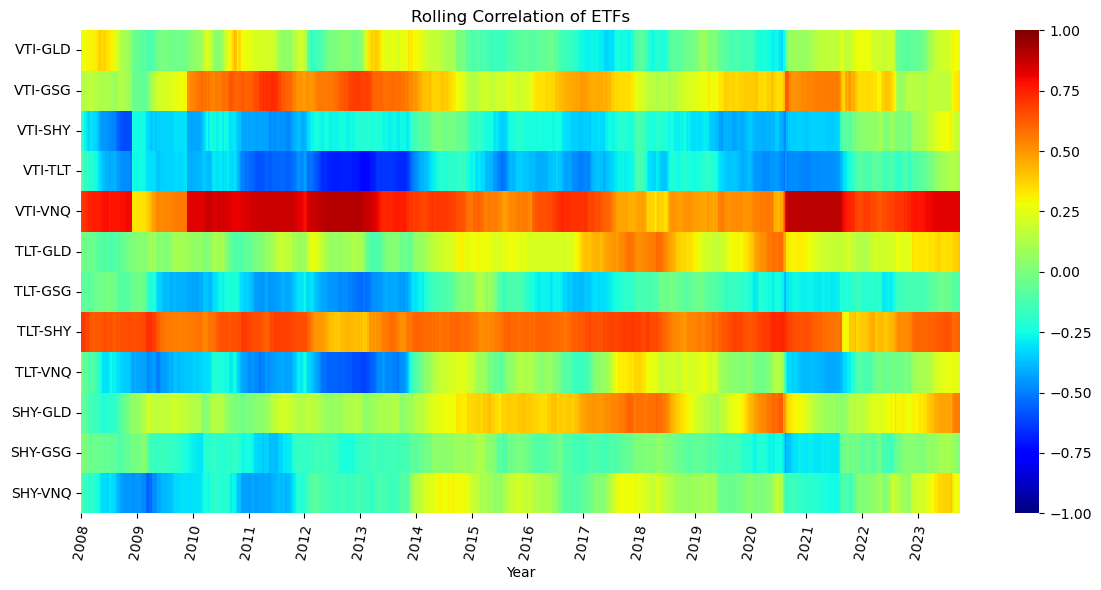

In [19]:
plt.figure(figsize=(12,6))
sns.heatmap(corr_matrix_T_drop2, 
            cmap="jet",
            vmin=-1,
            vmax=1)

plt.title("Rolling Correlation of ETFs")
plt.xticks(rotation="80", 
           ticks=np.arange(0,252*16,252), # 1년에는 주식이 보통 252일 열린다
           labels=["2008", "2009","2010","2011","2012","2013",
                   "2014","2015","2016","2017","2018","2019",
                   "2020","2021","2022","2023"])
plt.xlabel("Year")
plt.ylabel(None)
plt.tight_layout();